[This model is deployed here](https://ruchif.github.io/Rating-Converter/)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('final_cccf.csv')
df.drop(['ss_username' , 'cf_username' , 'cc_username']  , axis='columns', inplace=True)
new_df=df.dropna()
new_df

,cf_rating,cc_rating
0,3449.0,3007.0
4,1703.0,2673.0
5,2202.0,2628.0
6,2262.0,2628.0
7,2023.0,2565.0
...,...,...
10269,624.0,580.0
10270,1182.0,569.0
10272,979.0,518.0
10274,1581.0,460.0


In [ ]:
X=new_df['cf_rating'].values.reshape(-1 , 1)
Y=new_df['cc_rating'].values.reshape(-1 ,1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.33 , random_state=1)

In [ ]:
X_train.shape

(4316, 1)

In [ ]:
X_test.shape

(2126, 1)

In [ ]:
X_train =np.array(X_train)
X_test =np.array(X_test)
Y_train =np.array(Y_train)
Y_test =np.array(Y_test)

## **Scaling data using MinMaxScaler()**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X =MinMaxScaler()
scaler_X.fit(X_train)
X_train_scaled =scaler_X.transform(X_train)
X_test_scaled=scaler_X.transform(X_test)

In [ ]:
scaler_Y=MinMaxScaler()
scaler_Y.fit(Y_train)
Y_train_scaled =scaler_Y.transform(Y_train)
Y_test_scaled=scaler_Y.transform(Y_test)

In [ ]:
# Linear Regression

def train_Model(learning_rate , iterations , x , y):
  n=len(x)
  w=2000
  b=2000
  for i in range(iterations):
    y_pred = w*x+b
    dw=(-1/n)*(np.sum(x * (y-y_pred)))
    db=(-1/n)*(np.sum((y-y_pred )))
    w=w -learning_rate*dw
    b=b-learning_rate*db
    cost =(1/n)*np.sum((y-y_pred )**2)
    # if(i%100==0):
    #   print("Cost is :" , cost)
  print("Mean Squared Error is : "  , cost)
  print("w is : "  , w)
  print("b is : "  , b)
  return w , b , cost

In [ ]:
w , b , cost =train_Model(0.01  , 100000 ,X_train_scaled , Y_train_scaled )


Mean Squared Error is :  0.005947471068402847
w is :  0.6524387787117013
b is :  0.2572668474974999


## **Plots for predicted vs actual values (scaled)**

Text(0.5, 1.0, 'Codechef vs Codeforces ratings')

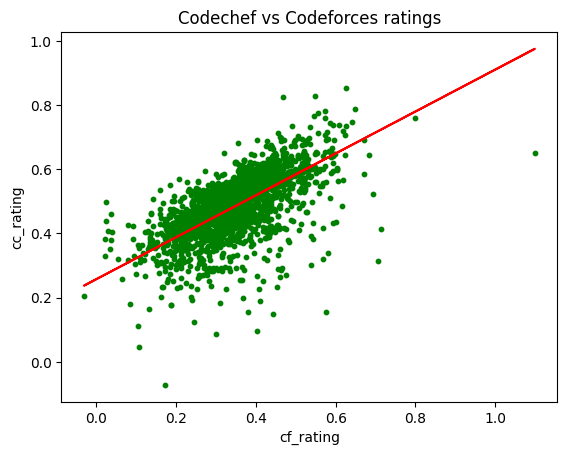

In [ ]:
y_pred_test = w*X_test_scaled + b
plt.scatter(x=X_test_scaled , y=Y_test_scaled , s=10 , color='green')
plt.plot(X_test_scaled , y_pred_test , color='red')
plt.xlabel('cf_rating')
plt.ylabel('cc_rating')

plt.title('Codechef vs Codeforces ratings')

Text(0.5, 1.0, 'Codechef vs Codeforces ratings')

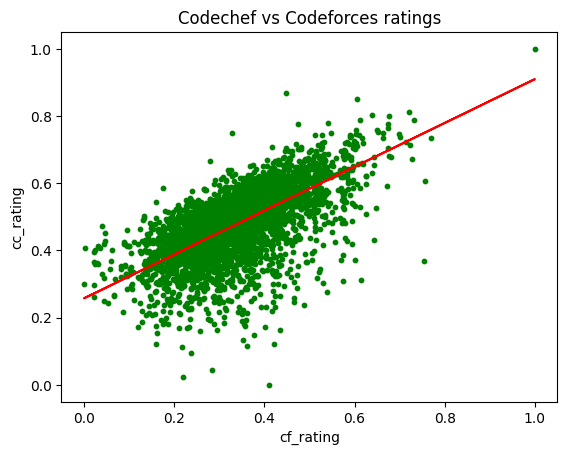

In [ ]:
y_pred_train = w*X_train_scaled + b
plt.scatter(x=X_train_scaled , y=Y_train_scaled , s=10 , color='green')
plt.plot(X_train_scaled , y_pred_train , color='red')
plt.xlabel('cf_rating')
plt.ylabel('cc_rating')
plt.title('Codechef vs Codeforces ratings')

In [ ]:
X_min = np.min(X_train, axis=0)
X_max = np.max(X_train, axis=0)

Y_min = np.min(Y_train, axis=0)
Y_max = np.max(Y_train, axis=0)


scale_factor_X=X_max-X_min
scale_factor_Y = Y_max - Y_min

w_original = w * (scale_factor_Y / scale_factor_X)
b_original = (b * scale_factor_Y) + Y_min - (w_original * X_min)

In [ ]:
def fun(forces):
    chef=(forces*w_original[0])+b_original[0]
    return chef

for z in range(700,2100,50):
    ans=round(fun(z) , 2)
    print("Codechef :",ans,"Codeforces :",z)

Codechef : 1332.76 Codeforces : 700
Codechef : 1359.03 Codeforces : 750
Codechef : 1385.3 Codeforces : 800
Codechef : 1411.57 Codeforces : 850
Codechef : 1437.84 Codeforces : 900
Codechef : 1464.11 Codeforces : 950
Codechef : 1490.38 Codeforces : 1000
Codechef : 1516.65 Codeforces : 1050
Codechef : 1542.91 Codeforces : 1100
Codechef : 1569.18 Codeforces : 1150
Codechef : 1595.45 Codeforces : 1200
Codechef : 1621.72 Codeforces : 1250
Codechef : 1647.99 Codeforces : 1300
Codechef : 1674.26 Codeforces : 1350
Codechef : 1700.53 Codeforces : 1400
Codechef : 1726.8 Codeforces : 1450
Codechef : 1753.06 Codeforces : 1500
Codechef : 1779.33 Codeforces : 1550
Codechef : 1805.6 Codeforces : 1600
Codechef : 1831.87 Codeforces : 1650
Codechef : 1858.14 Codeforces : 1700
Codechef : 1884.41 Codeforces : 1750
Codechef : 1910.68 Codeforces : 1800
Codechef : 1936.95 Codeforces : 1850
Codechef : 1963.21 Codeforces : 1900
Codechef : 1989.48 Codeforces : 1950
Codechef : 2015.75 Codeforces : 2000
Codechef :

In [ ]:
print ('w = {}  b= {}'.format(w_original[0] , b_original[0]))

# cc =w*cf+b

w = 0.5253751404927927  b= 965.0013703951934


## **Plots for unscaled data using w_original and b_original**




Text(0.5, 1.0, 'Codechef vs Codeforces ratings')

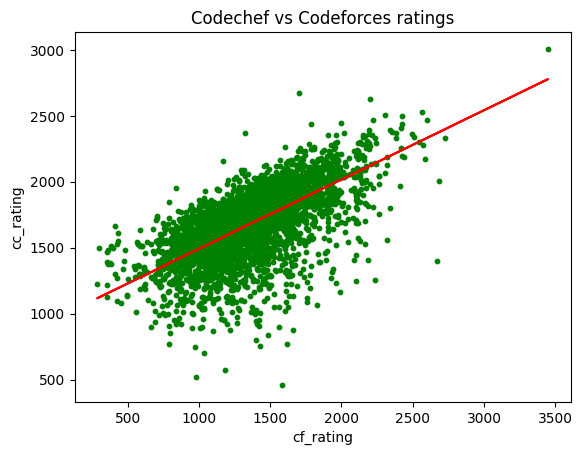

In [ ]:
y_pred_train_original = w_original*X_train + b_original
plt.scatter(x=X_train , y=Y_train , s=10 , color='green')
plt.plot(X_train , y_pred_train_original , color='red')
plt.xlabel('cf_rating')
plt.ylabel('cc_rating')
plt.title('Codechef vs Codeforces ratings')

Text(0.5, 1.0, 'Codechef vs Codeforces ratings')

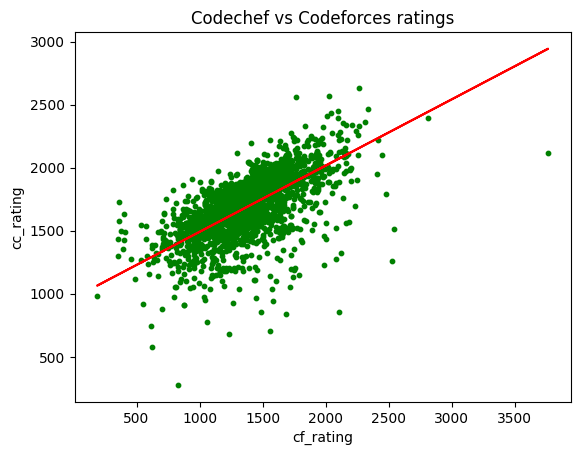

In [ ]:
y_pred_test_original = w_original*X_test + b_original
plt.scatter(x=X_test , y=Y_test , s=10 , color='green')
plt.plot(X_test , y_pred_test_original , color='red')
plt.xlabel('cf_rating')
plt.ylabel('cc_rating')
plt.title('Codechef vs Codeforces ratings')